In [2]:
print('hello')

hello


In [3]:
import os 

os.getcwd()

'c:\\Users\\arshi\\Downloads\\Desktop\\Bro-Project\\SkillForge.ai\\research'

In [4]:
os.chdir('c:\\Users\\arshi\\Downloads\\Desktop\\Bro-Project\\SkillForge.ai')

In [5]:
os.getcwd()

'c:\\Users\\arshi\\Downloads\\Desktop\\Bro-Project\\SkillForge.ai'

In [6]:
# img_path = "data\\images"

In [7]:
from ultralytics import YOLO

In [11]:
model = YOLO(r"runs\classify\train\weights\best.pt")

In [12]:
model

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track

In [1]:
# results = model.train(data=img_path, epochs=20, imgsz=640)

In [13]:
from IPython.display import Image

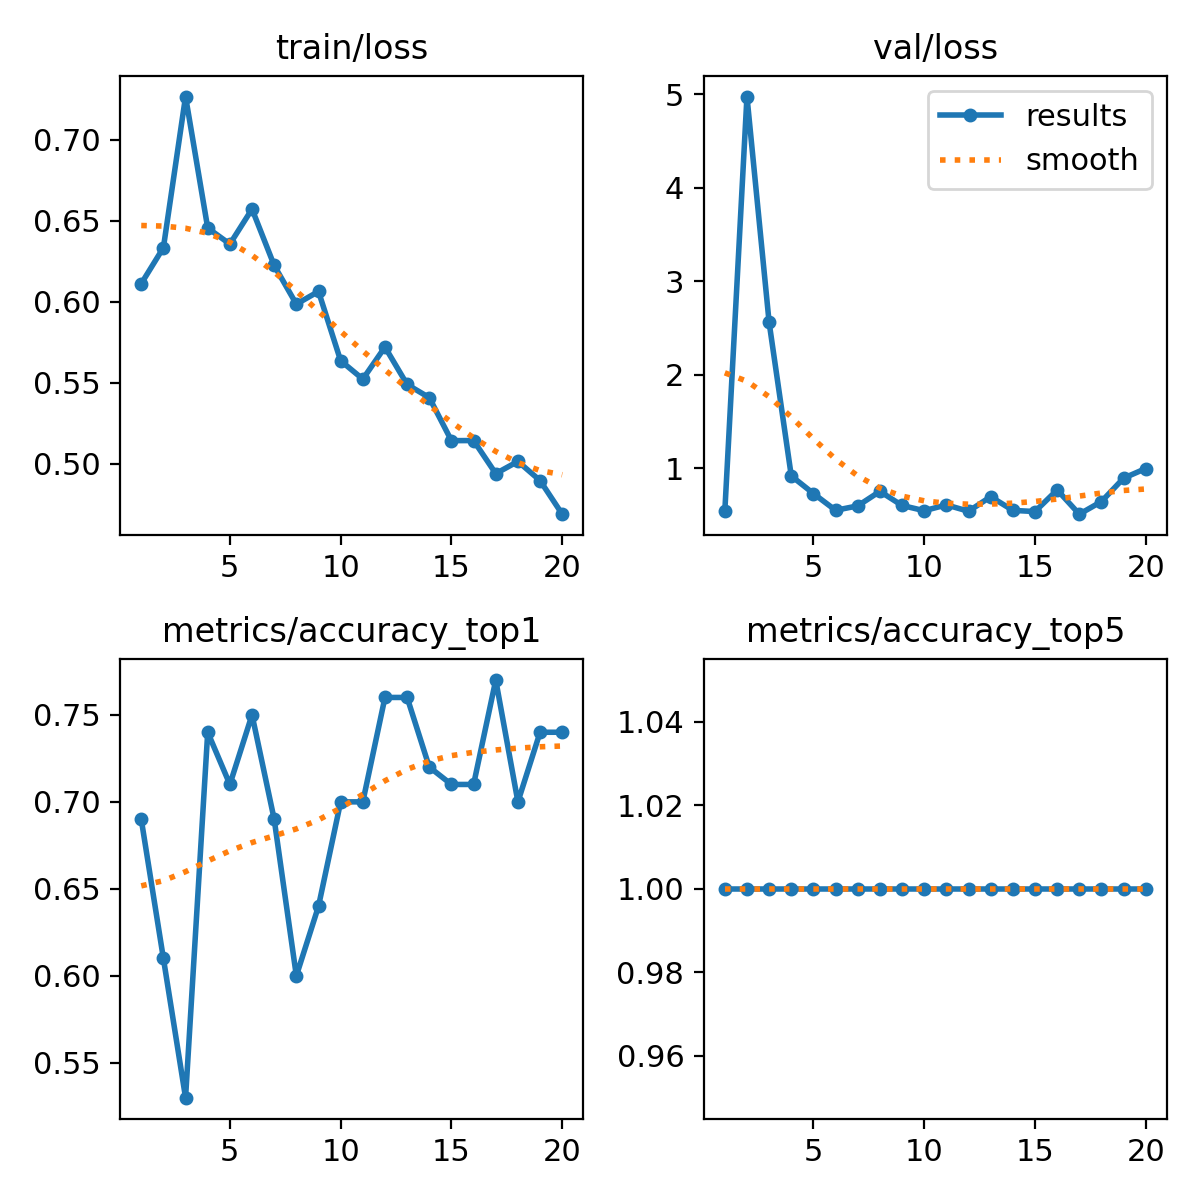

In [16]:
Image('runs\\classify\\train\\results.png',width=600)

In [34]:
def predict(img_path):
    result = model(img_path)
    print(result[0].show())
    return result

In [31]:
# import matplotlib.pyplot as plt 

In [35]:
predict('data\\sample10.jpeg')


image 1/1 c:\Users\arshi\Downloads\Desktop\Bro-Project\SkillForge.ai\data\sample10.jpeg: 640x640 professional 0.52, casual 0.48, 366.0ms
Speed: 48.6ms preprocess, 366.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
None


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'casual', 1: 'professional'}
 obb: None
 orig_img: array([[[232, 235, 226],
         [231, 234, 225],
         [233, 236, 227],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[233, 236, 227],
         [231, 234, 225],
         [233, 236, 227],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[233, 236, 227],
         [232, 235, 226],
         [233, 236, 227],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[219, 207, 189],
         [219, 207, 189],
         [219, 207, 189],
         ...,
         [240, 238, 237],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[217, 205, 187],
         [217, 205, 187],
         [217, 205, 187],
         ...,
         [241, 239, 238],
        

In [33]:
predict('data\\sample11.jpeg')


image 1/1 c:\Users\arshi\Downloads\Desktop\Bro-Project\SkillForge.ai\data\sample11.jpeg: 640x640 professional 0.78, casual 0.22, 288.3ms
Speed: 33.8ms preprocess, 288.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


In [48]:
def predict_score(img_path):
    result = model(img_path)
    probs = result[0].probs
    professional_prob = probs.data[1]
    return "Professional score " +str(round(professional_prob.tolist() * 100,2))

In [56]:
score = predict_score('data\\sample11.jpeg')

image 1/1 c:\Users\arshi\Downloads\Desktop\Bro-Project\SkillForge.ai\data\sample11.jpeg: 640x640 professional 0.78, casual 0.22, 509.3ms
Speed: 92.1ms preprocess, 509.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


In [57]:
score

'Professional score 78.5'

In [50]:
from dotenv import load_dotenv

In [51]:
load_dotenv()

True

In [52]:
from langchain_groq import ChatGroq
from langchain.prompts import ChatPromptTemplate

In [53]:
llm = ChatGroq(
    model="llama-3.3-70b-versatile",
)

In [63]:
prompt = ChatPromptTemplate.from_template(
    """
    important: generate different response every time.
    
    Generate professional profile feedback for score {score}. Include:
    1. First impression analysis
    2. Technical evaluation (lighting/attire/background)
    3. Improvement checklist
    4. Professional benchmark comparison
    5. give a correct idea to get professional look, explain in detail.
    
    Response format:
    **Analysis**: [100 words]
    **Technical**: [5 bullet points]
    **Improve**: [5 actions]
    **Benchmark**: [comparison to industry standard]"""
)

In [64]:
def generate_response(score):
    formatted_prompt = prompt.format(score=score)
    
    response = llm.invoke(formatted_prompt)
    return response.content

In [65]:
response = generate_response(score)

print(response)

**Analysis**: With a professional score of 78.5, your profile presents a solid foundation, but there's room for refinement. The first impression suggests a competent individual, though certain aspects, such as the background and attire, could be more polished to elevate the professional image. The overall effect is good, but attention to detail in technical aspects will significantly enhance the profile's impact.

**Technical**:
* Lighting: The current lighting is somewhat soft and could be more balanced to accentuate features without harsh shadows.
* Attire: The choice of clothing is professional but lacks a touch of personality that could make the profile more engaging.
* Background: A plain background is used, which is safe but doesn't add much depth or character to the profile.
* Accessories: Minimal accessories are worn, which is good, but a watch or a simple necklace could add a touch of sophistication.
* Posture: The posture appears confident, but slightly more attention to stan

In [66]:
import pandas as pd 


In [67]:
df = pd.read_csv("runs\\classify\\train\\results.csv")

In [69]:
df.head()

,epoch,time,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,114.744,0.61120,0.69,1,0.53625,0.000545,0.000545,0.000545
1,2,219.204,0.63338,0.61,1,4.97559,0.001046,0.001046,0.001046
2,3,329.088,0.72660,0.53,1,2.55835,0.001493,0.001493,0.001493
3,4,451.646,0.64552,0.74,1,0.91614,0.001419,0.001419,0.001419
4,5,555.521,0.63561,0.71,1,0.72760,0.001337,0.001337,0.001337


In [71]:
df

,epoch,time,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,1,114.744,0.61120,0.69,1,0.53625,0.000545,0.000545,0.000545
1,2,219.204,0.63338,0.61,1,4.97559,0.001046,0.001046,0.001046
2,3,329.088,0.72660,0.53,1,2.55835,0.001493,0.001493,0.001493
3,4,451.646,0.64552,0.74,1,0.91614,0.001419,0.001419,0.001419
4,5,555.521,0.63561,0.71,1,0.72760,0.001337,0.001337,0.001337
5,6,653.115,0.65718,0.75,1,0.54828,0.001254,0.001254,0.001254
6,7,761.277,0.62245,0.69,1,0.59558,0.001172,0.001172,0.001172
7,8,877.165,0.59856,0.60,1,0.75110,0.001089,0.001089,0.001089
8,9,1015.120,0.60639,0.64,1,0.59984,0.001007,0.001007,0.001007
9,10,1194.400,0.56364,0.70,1,0.54382,0.000924,0.000924,0.000924
